# **1) Without Importance Sampling**

# **Importing Essential Librarires**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import warnings
import random
import copy
import sys
from scipy.stats import norm
warnings.filterwarnings('ignore')
style.use('ggplot')
from google.colab import files
random.seed(10)

# **Declaring Global constant Values**

In [ ]:
H0 = 100
c = 3 * (10**5)

# **Defining Functions for computing the luminosity distance and theoretical distance modulus**

In [ ]:
def Eta_function(a, Omega_matter):
  s = ((1 - Omega_matter)/(Omega_matter))**(0.33)
  return_val = 2 * np.sqrt(s**3 + 1) * ((1/(a**4)) - (0.1540 * s/(a**3)) +(0.4304*(s**2/a**2)) + (0.19097*(s**3/a)) + 0.066941 * (s**4))**(-0.125)
  return return_val

In [ ]:
def Luminosity_Distance(z, omega_m):
  return_val = (c)/(H0) * (1+z) * (Eta_function(1, omega_m) - Eta_function((1/(1+z)), omega_m))
  return return_val

# **Defining Function to Convert given covariance array into a matrix**

In [ ]:
def Matrix(arr, N):
  res = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      res[i][j] = arr[N*i + j]
  return res

# **Main Function**

In [ ]:
# Load the data and covariance array
data = np.loadtxt('jla_mub_0.txt')
z = data[:,0]
mu_obs = data[:,1]
cov_array = np.loadtxt('jla_mub_covmatrix.txt')
N = 31
cov_matrix = Matrix(cov_array, N)
cov_inv = np.linalg.inv(cov_matrix)

# Likelihood function
def log_likelihood(params):
    h, om = params
    mu_th = np.zeros_like(mu_obs)
    for i, z_i in enumerate(z):
        # Compute the theoretical value of the distance modulus
        dl = Luminosity_Distance(z_i, om) # Luminosity Distance
        mu_th[i] =  25 - (5 * np.log10(h)) + (5*np.log10(dl)) # distance modulus
    diff = mu_obs - mu_th
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Prior function
def log_prior(params):
    h, om = params
    if 0.0 < h < 1.0 and 0.0 < om < 1.0:
        return 0.0
    else:
        return -np.inf

# Proposal function Top Hat
def propose(params, scale):
    return np.random.normal(params, scale)

# **MH - MCMC Code**

1) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.55380391 0.35321423]
Covariance of posterior distribution: [[0.00533719 0.00075306]
 [0.00075306 0.00012129]]
Acceptance ratio: 0.559

2) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.70495496 0.2836249 ]
Covariance of posterior distribution: [[ 4.41862170e-05 -6.73455644e-05]
 [-6.73455644e-05  4.54047199e-04]]
Acceptance ratio: 0.495

3) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.70224941 0.29104958]
Covariance of posterior distribution: [[ 3.30287572e-05 -1.16405300e-04]
 [-1.16405300e-04  6.64318516e-04]]
Acceptance ratio: 0.026

4) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.72032244 0.36178617]
Covariance of posterior distribution: [[ 0.0001187  -0.00103129]
 [-0.00103129  0.00895986]]
Acceptance ratio: 0.006

5) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.3 0.3]
Covariance of posterior distribution: [[1.03809341e-29 1.03809341e-29]
 [1.03809341e-29 1.03809341e-29]]
Acceptance ratio: 0.0

6) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean of posterior distribution: [0.3 0.3]
Covariance of posterior distribution: [[1.03809341e-29 1.03809341e-29]
 [1.03809341e-29 1.03809341e-29]]
Acceptance ratio: 0.0

[[0.71007987 0.27612817]
 [0.71007987 0.27612817]
 [0.71007987 0.27612817]
 ...
 [0.70071787 0.33054036]
 [0.69791894 0.34439675]
 [0.69791894 0.34439675]]


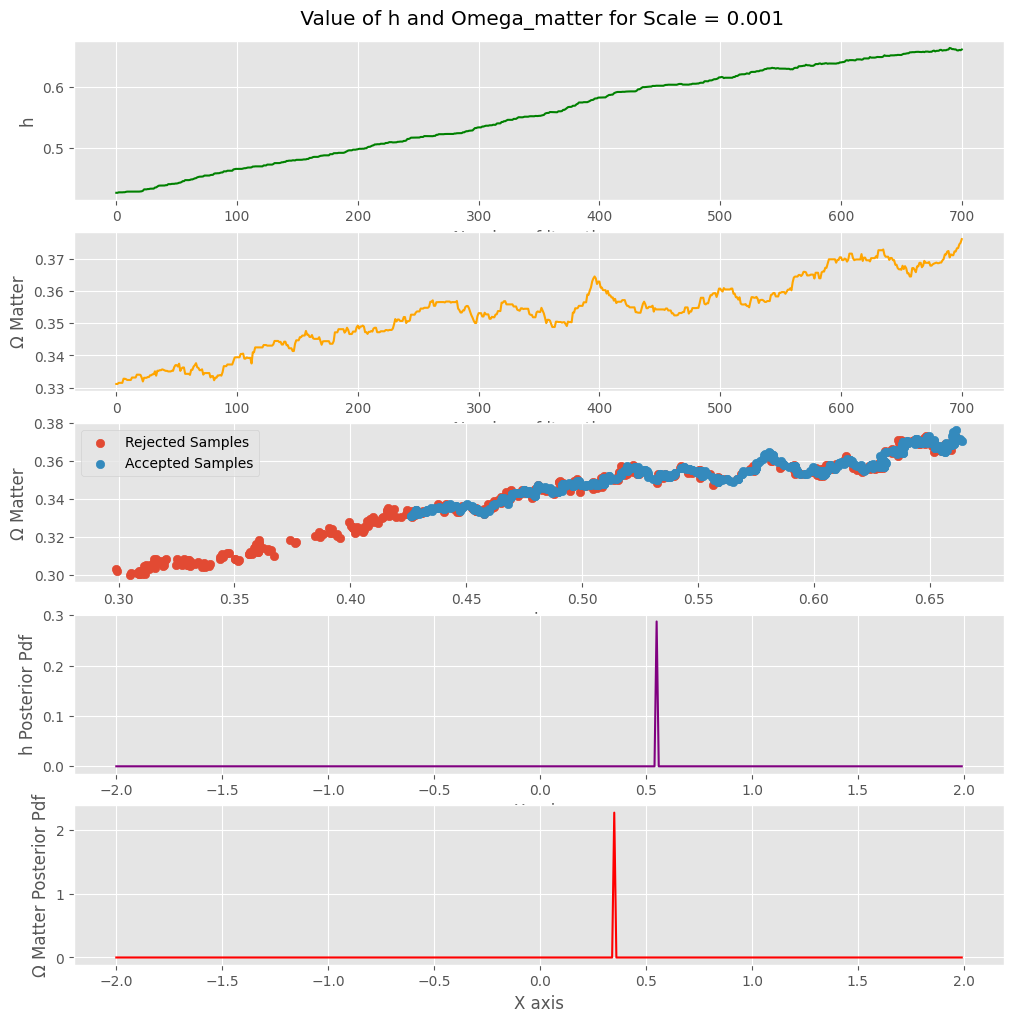

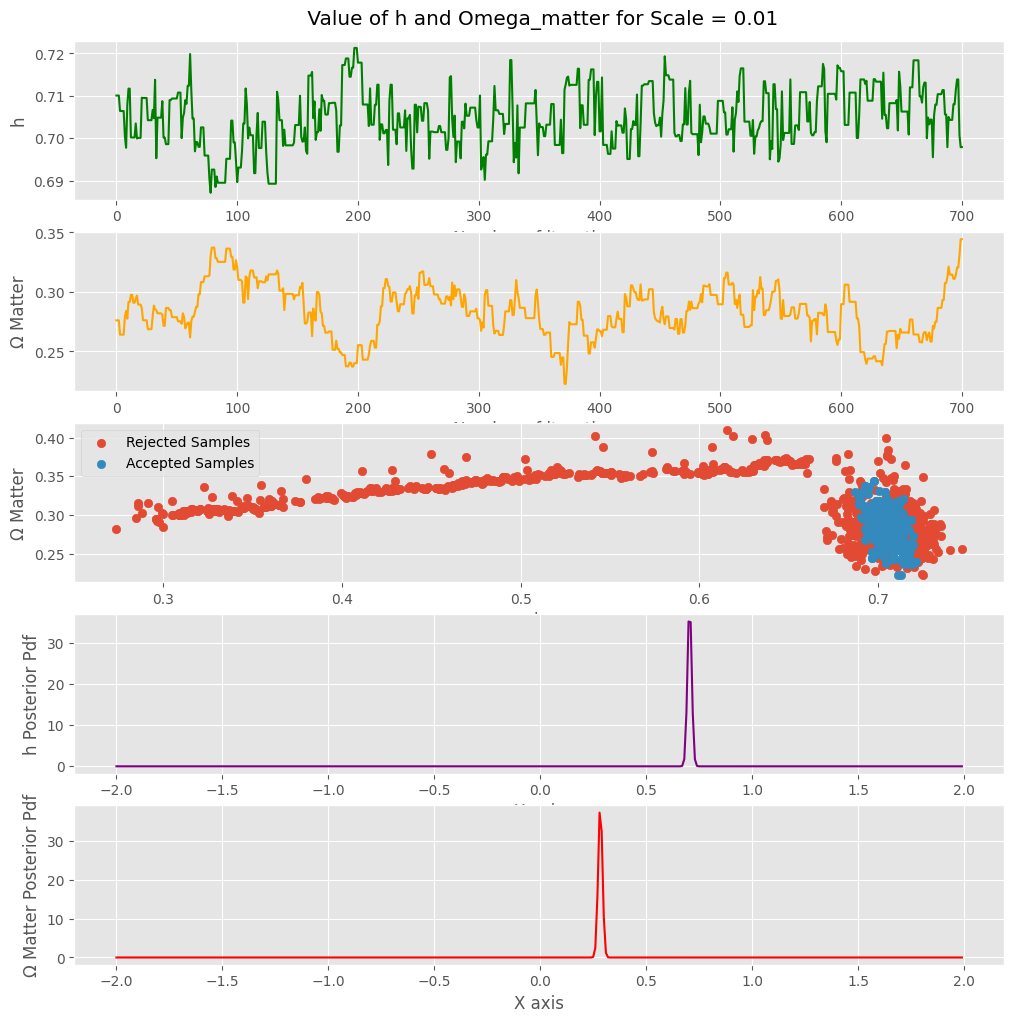

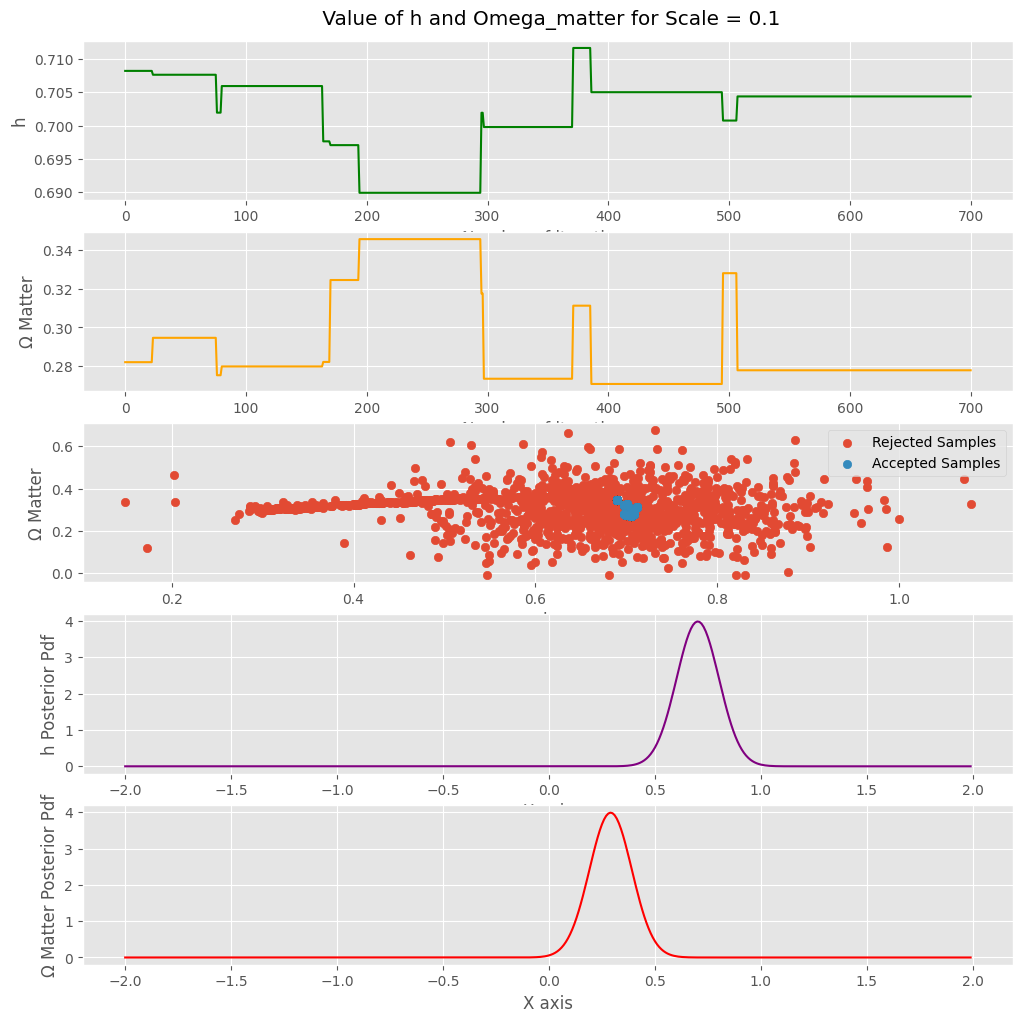

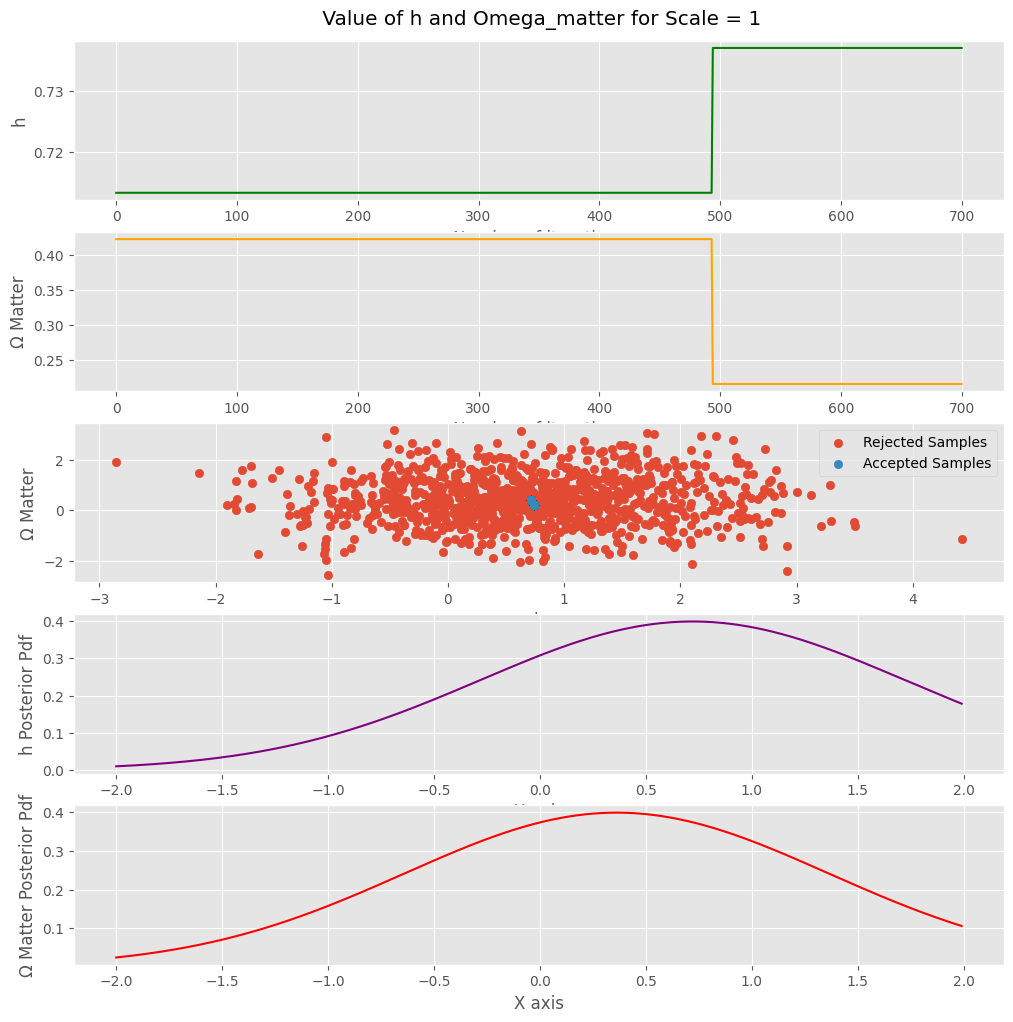

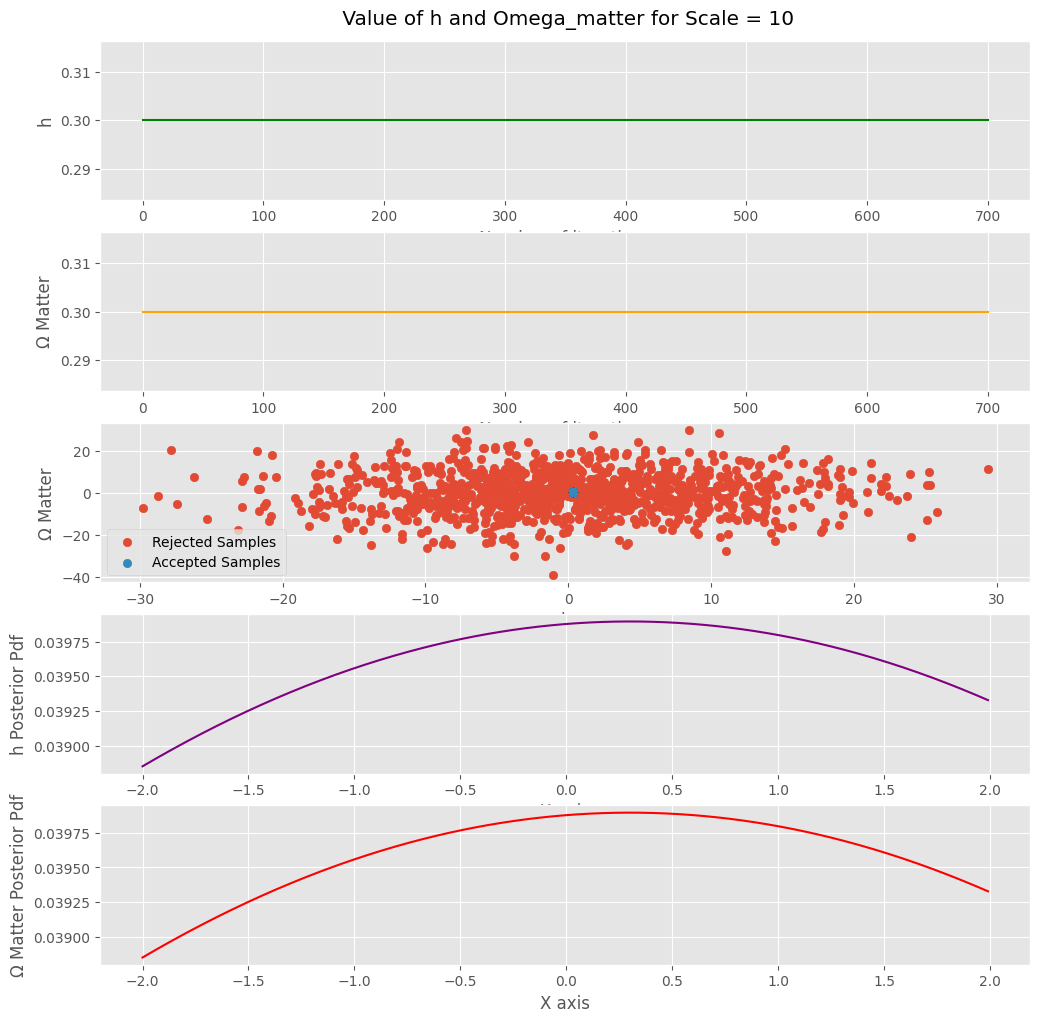

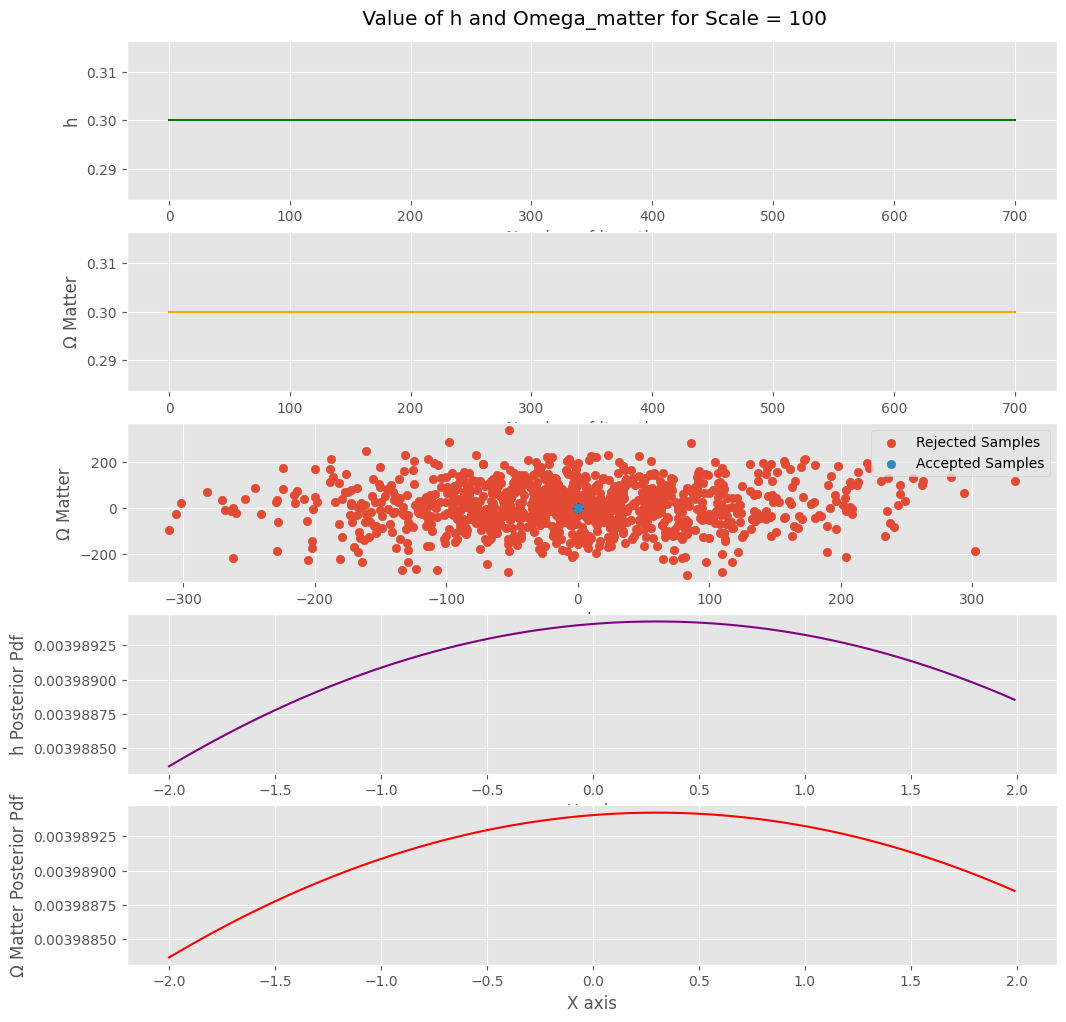

In [ ]:
# Define the Metropolis-Hastings algorithm
Rejected_Samples = []
def metropolis_hastings(log_likelihood, log_prior, propose, params, cov, n_steps, scale):
    chain = [params]
    log_prob_chain = [log_prior(params) + log_likelihood(params)]
    n_accept = 0
    for i in range(n_steps):
        params_new = propose(params, scale)
        log_prob_new = log_prior(params_new) + log_likelihood(params_new)
        log_prob_old = log_prob_chain[-1]
        log_accept_ratio = log_prob_new - log_prob_old
        if np.log(np.random.rand()) < log_accept_ratio:
            chain.append(params_new)
            log_prob_chain.append(log_prob_new)
            params = params_new
            n_accept += 1
        else:
            Rejected_Samples.append((params_new))
            chain.append(params)
            log_prob_chain.append(log_prob_old)
    # # Discard the burn-in period of the chain
    burnin = int(n_steps * 0.3)
    chain = chain[burnin:]
    return np.array(chain), np.array(log_prob_chain), n_accept/n_steps

# Set up initial parameters and run the MCMC algorithm
n_steps = 1000
scale = [0.001,0.01,0.1,1,10,100]
params0 = np.array([0.3, 0.3])
Acceptance = []
for i in range(len(scale)):
  chain1, log_prob_chain, acceptance_ratio = metropolis_hastings(log_likelihood, log_prior, propose, params0, cov_matrix, n_steps, scale[i])
  print(str(i+1) + str(") "))
  print("")
  x_axis = np.arange(-2, 2, 0.01)
  # Compute the mean and covariance of the posterior distribution
  post_mean = np.mean(chain1, axis=0)
  post_cov = np.cov(chain1.T)
  # # Plot the chains
  fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,12))
  title_val = " Value of h and Omega_matter for Scale = " + str(scale[i])
  plt.title(title_val, y = 5.85)
  axes[0].plot(chain1[:,0], 'green')
  axes[0].set_ylabel('h')
  axes[0].set_xlabel('Number of iterations')
  axes[1].plot(chain1[:,1], 'orange')
  axes[1].set_ylabel('\u03A9 Matter')
  axes[1].set_xlabel('Number of iterations')
  Rejected_h = []
  Rejected_Omega_m = []
  for j in (Rejected_Samples):
    Rejected_h.append(j[0])
    Rejected_Omega_m.append(j[1])
  axes[2].scatter(Rejected_h,Rejected_Omega_m, label = "Rejected Samples")
  axes[2].scatter(chain1[:,0], chain1[:,1], label = "Accepted Samples")
  axes[2].set_ylabel('\u03A9 Matter')
  axes[2].set_xlabel('h')
  axes[2].legend()
  axes[3].plot(x_axis, norm.pdf(x_axis, post_mean[0], scale[i]), 'purple')
  axes[3].set_ylabel('h Posterior Pdf')
  axes[3].set_xlabel('X axis')
  axes[4].plot(x_axis, norm.pdf(x_axis, post_mean[1], scale[i]), 'red')
  axes[4].set_ylabel('\u03A9 Matter Posterior Pdf')
  axes[4].set_xlabel('X axis')
  fig.tight_layout(pad = 5.0)
  plt.savefig(title_val + ".png")
  files.download(title_val + ".png")


  print('Mean of posterior distribution:', post_mean)
  print('Covariance of posterior distribution:', post_cov)
  print('Acceptance ratio:', acceptance_ratio)
  Acceptance.append(acceptance_ratio)
  print("")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

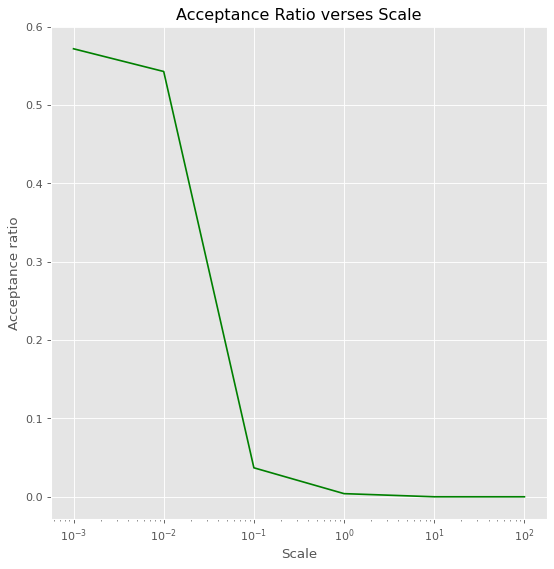

In [ ]:
fig = plt.figure(figsize = (8,8) , dpi = 80)
plt.plot(scale, Acceptance , "g" , )
plt.xlabel("Scale")
plt.ylabel("Acceptance ratio")
plt.title("Acceptance Ratio verses Scale")
plt.xscale("log")
plt.savefig("Acceptance Ratio verses Scale.png")
files.download("Acceptance Ratio verses Scale.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

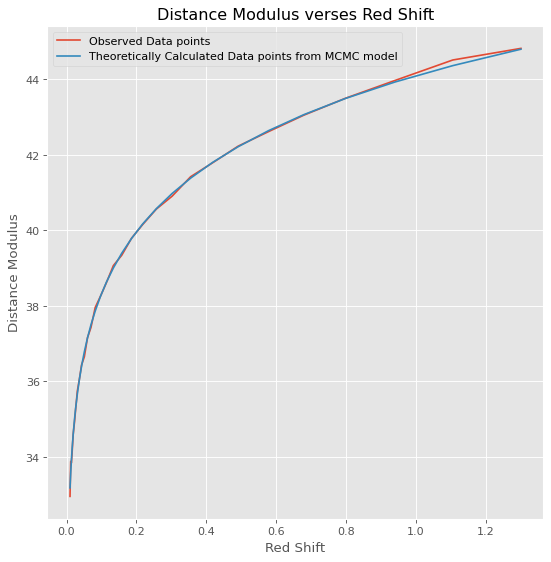

In [ ]:
mu_th_target = []
for z_i in z:
  mu_th_target.append(25 - (5 * np.log10(0.70083242)) + (5*np.log10(Luminosity_Distance(z_i, 0.30083765))))
fig = plt.figure(figsize = (8,8), dpi = 80)
plt.title("Distance Modulus verses Red Shift")
plt.plot(z,mu_obs,label = "Observed Data points")
plt.plot(z,mu_th_target, label = "Theoretically Calculated Data points from MCMC model")
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")
plt.legend()
plt.savefig("Distance Modulus verses Red Shift.png")
files.download("Distance Modulus verses Red Shift.png")

# **2) With Importance Sampling**

# **Main Function**

In [ ]:
# Load the data and covariance array
data = np.loadtxt('jla_mub_0.txt')
z = data[:,0]
mu_obs = data[:,1]
cov_array = np.loadtxt('jla_mub_covmatrix.txt')
N = 31
cov_matrix = Matrix(cov_array, N)
cov_inv = np.linalg.inv(cov_matrix)

# Likelihood function
def log_likelihood(params):
    h, om = params
    mu_th = np.zeros_like(mu_obs)
    for i, z_i in enumerate(z):
        # Compute the theoretical value of the distance modulus
        dl = Luminosity_Distance(z_i, om) # Luminosity Distance
        mu_th[i] =  25 - (5 * np.log10(h)) + (5*np.log10(dl)) # distance modulus
    diff = mu_obs - mu_th
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Prior function
def log_prior(params):
    h, om = params
    normal_h = norm(0.738, 0.024)
    pdf_value = normal_h.pdf(h)
    return pdf_value

# Proposal function Top Hat
def propose(params, scale):
    return np.random.normal(params, scale)

# **MH - MCMC Code**

1) 

Mean of posterior distribution: [0.54787282 0.29572681]
Covariance of posterior distribution: [[6.29851966e-03 2.97593971e-04]
 [2.97593971e-04 2.85819528e-05]]
Acceptance ratio: 0.542

2) 

Mean of posterior distribution: [0.72071845 0.24511063]
Covariance of posterior distribution: [[ 3.35685416e-05 -8.34426499e-05]
 [-8.34426499e-05  6.88246543e-04]]
Acceptance ratio: 0.475

3) 

Mean of posterior distribution: [0.7211465 0.2569138]
Covariance of posterior distribution: [[ 2.74914163e-05 -1.14437337e-05]
 [-1.14437337e-05  5.04926400e-04]]
Acceptance ratio: 0.037

4) 

Mean of posterior distribution: [0.70628187 0.08426476]
Covariance of posterior distribution: [[ 0.00013026 -0.00042271]
 [-0.00042271  0.00159652]]
Acceptance ratio: 0.005

5) 

Mean of posterior distribution: [0.50923544 0.50236696]
Covariance of posterior distribution: [[0.1018132  0.09847102]
 [0.09847102 0.09523856]]
Acceptance ratio: 0.001

6) 

Mean of posterior distribution: [0.3 0.3]
Covariance of poster

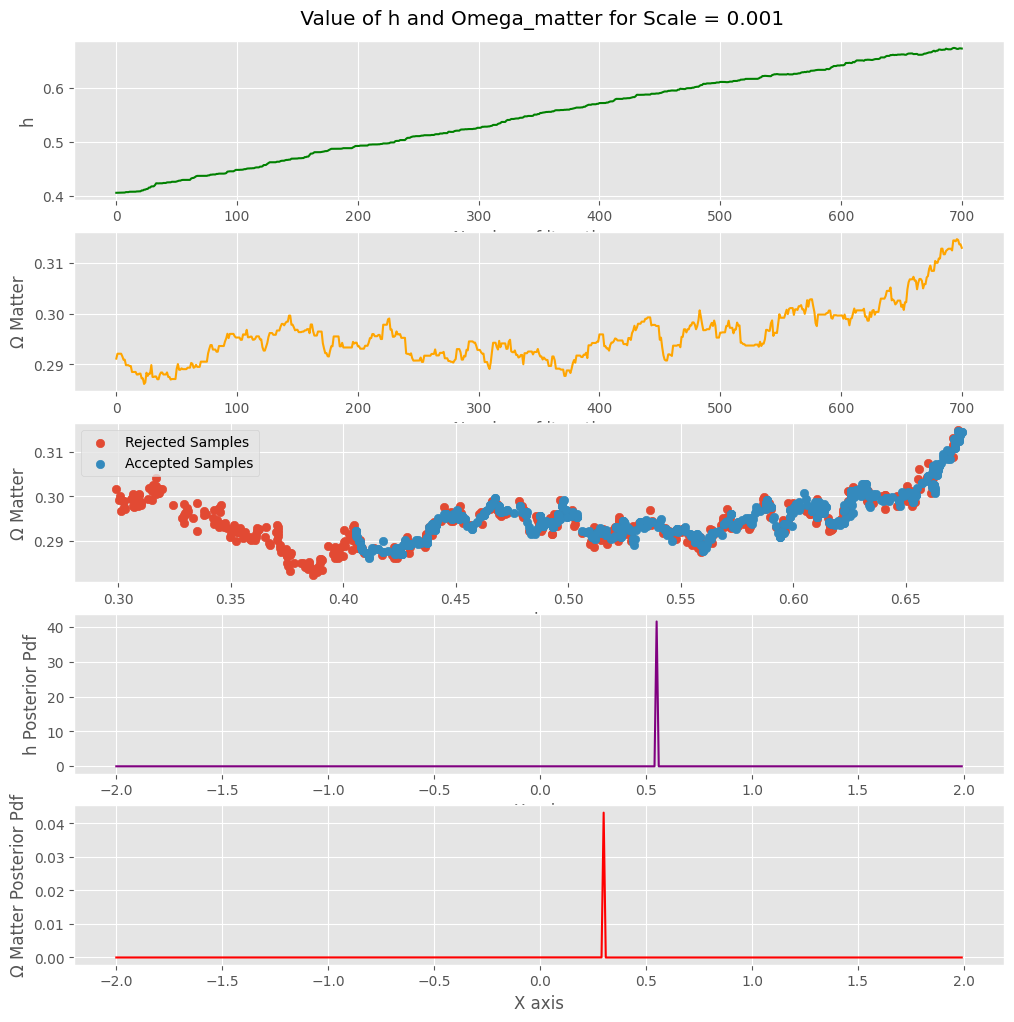

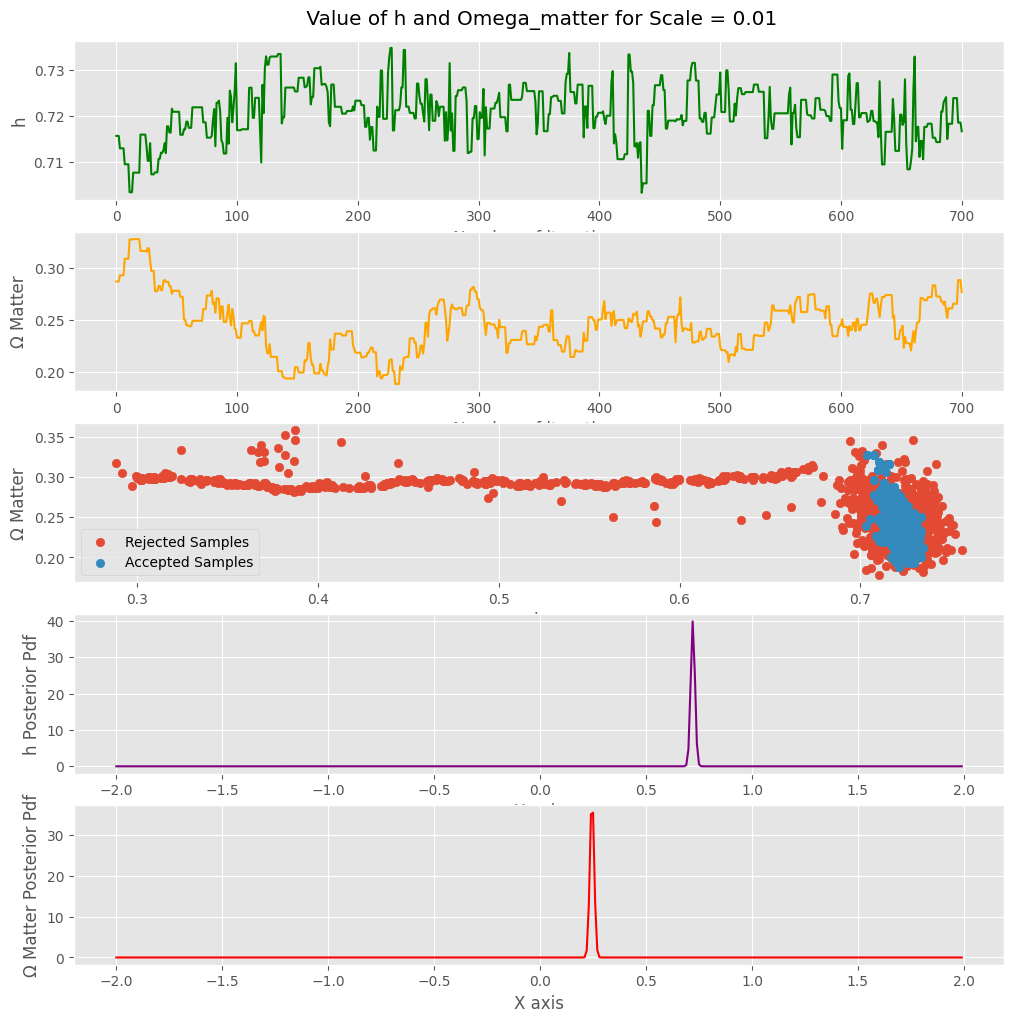

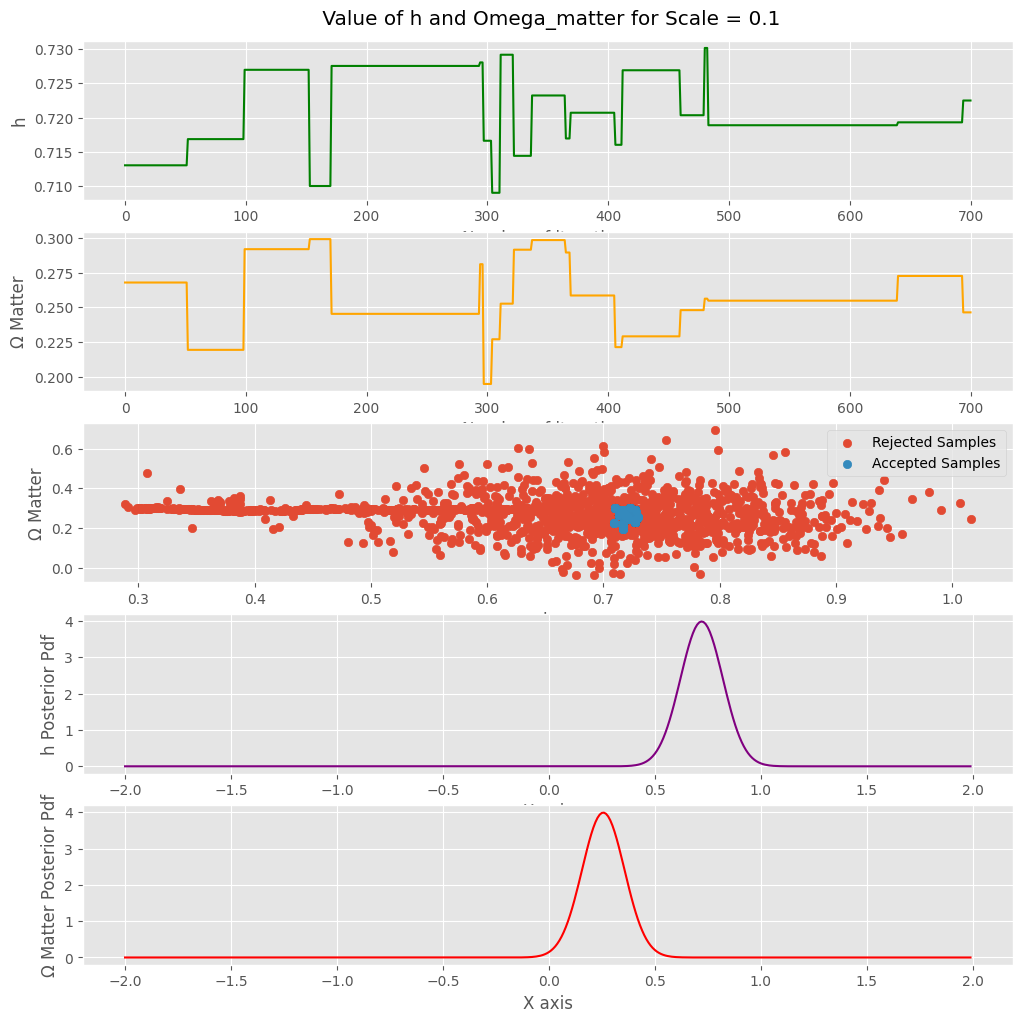

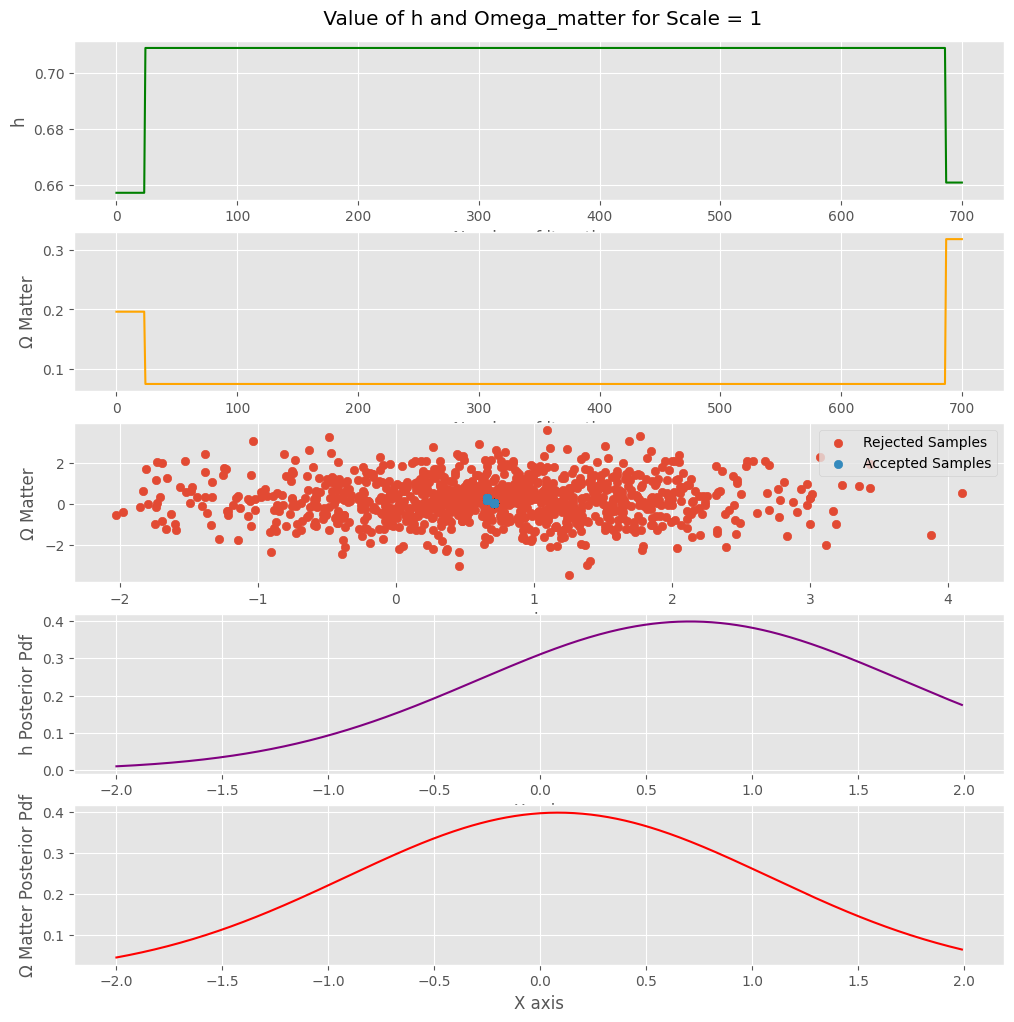

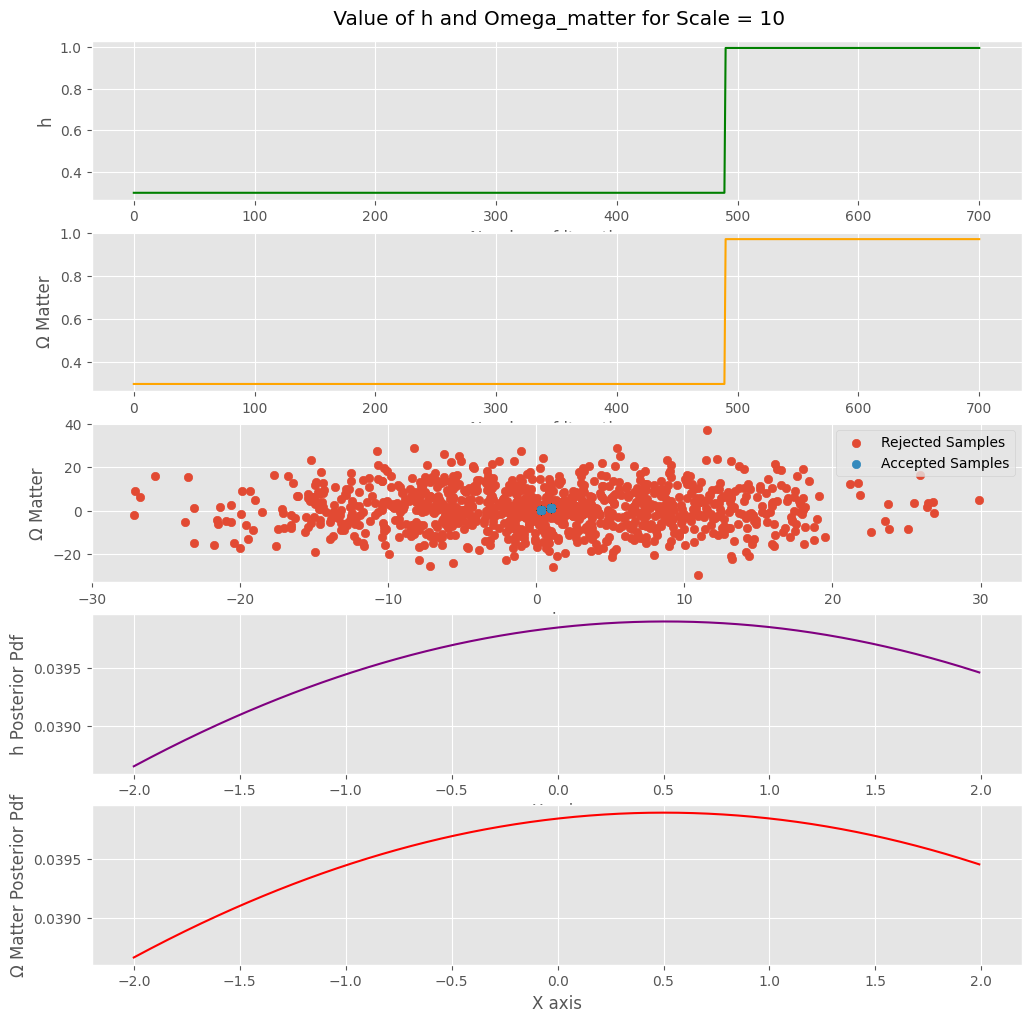

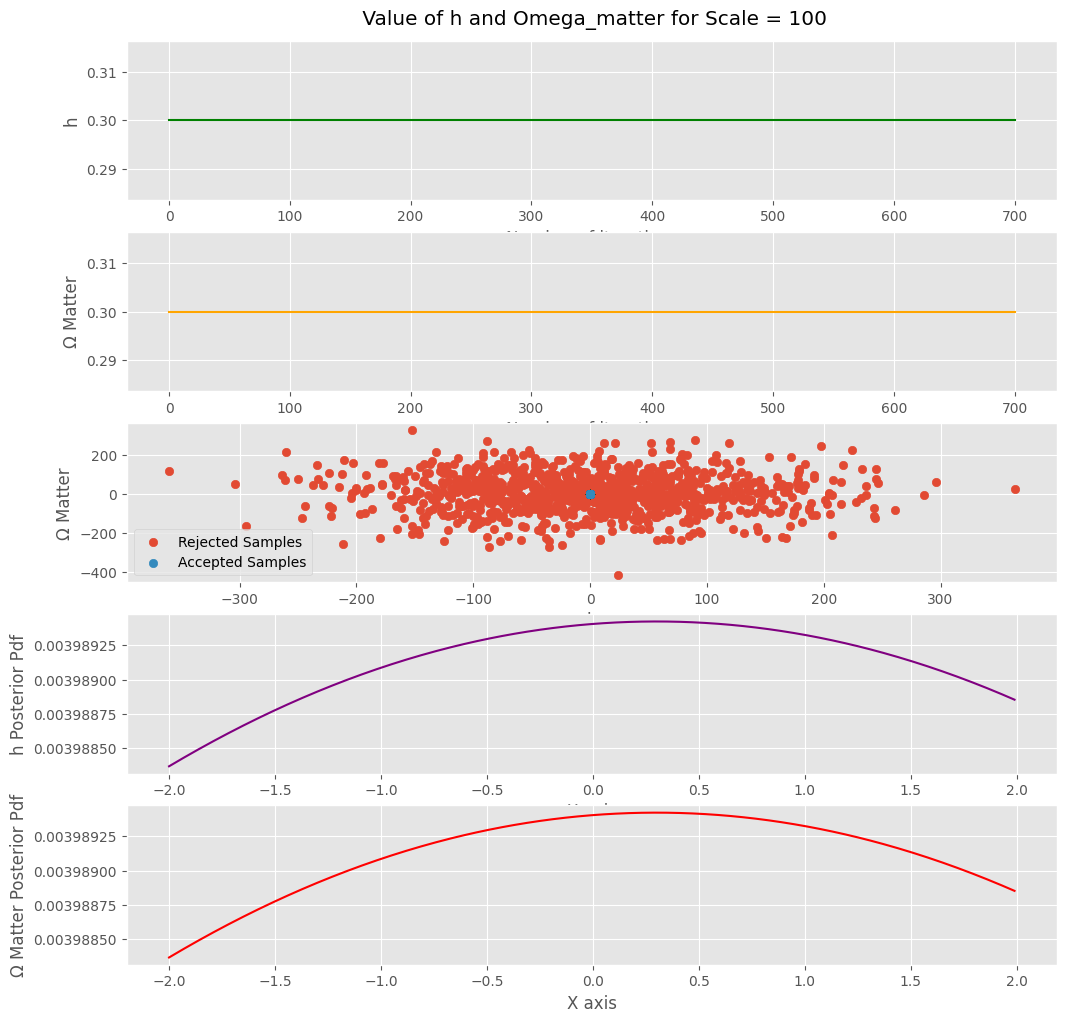

In [ ]:
# Define the Metropolis-Hastings algorithm
Rejected_Samples = []
def metropolis_hastings(log_likelihood, log_prior, propose, params, cov, n_steps, scale):
    chain = [params]
    log_prob_chain = [log_prior(params) + log_likelihood(params)]
    n_accept = 0
    for i in range(n_steps):
        params_new = propose(params, scale)
        log_prob_new = log_prior(params_new) + log_likelihood(params_new)
        log_prob_old = log_prob_chain[-1]
        log_accept_ratio = log_prob_new - log_prob_old
        if np.log(np.random.rand()) < log_accept_ratio:
            chain.append(params_new)
            log_prob_chain.append(log_prob_new)
            params = params_new
            n_accept += 1
        else:
            Rejected_Samples.append((params_new))
            chain.append(params)
            log_prob_chain.append(log_prob_old)
    # # Discard the burn-in period of the chain
    burnin = int(n_steps * 0.3)
    chain = chain[burnin:]
    return np.array(chain), np.array(log_prob_chain), n_accept/n_steps

# Set up initial parameters and run the MCMC algorithm
n_steps = 1000
scale = [0.001,0.01,0.1,1,10,100]
params0 = np.array([0.3, 0.3])
Acceptance = []
for i in range(len(scale)):
  chain2, log_prob_chain, acceptance_ratio = metropolis_hastings(log_likelihood, log_prior, propose, params0, cov_matrix, n_steps, scale[i])
  print(str(i+1) + str(") "))
  print("")
  x_axis = np.arange(-2, 2, 0.01)
  # Compute the mean and covariance of the posterior distribution
  post_mean = np.mean(chain2, axis=0)
  post_cov = np.cov(chain2.T)
  # # Plot the chains
  fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12,12))
  title_val = " Value of h and Omega_matter for Scale = " + str(scale[i])
  plt.title(title_val, y = 5.85)
  axes[0].plot(chain2[:,0], 'green')
  axes[0].set_ylabel('h')
  axes[0].set_xlabel('Number of iterations')
  axes[1].plot(chain2[:,1], 'orange')
  axes[1].set_ylabel('\u03A9 Matter')
  axes[1].set_xlabel('Number of iterations')
  Rejected_h = []
  Rejected_Omega_m = []
  for j in (Rejected_Samples):
    Rejected_h.append(j[0])
    Rejected_Omega_m.append(j[1])
  axes[2].scatter(Rejected_h,Rejected_Omega_m, label = "Rejected Samples")
  axes[2].scatter(chain2[:,0], chain2[:,1], label = "Accepted Samples")
  axes[2].set_ylabel('\u03A9 Matter')
  axes[2].set_xlabel('h')
  axes[2].legend()
  axes[3].plot(x_axis, norm.pdf(x_axis, post_mean[0], scale[i]), 'purple')
  axes[3].set_ylabel('h Posterior Pdf')
  axes[3].set_xlabel('X axis')
  axes[4].plot(x_axis, norm.pdf(x_axis, post_mean[1], scale[i]), 'red')
  axes[4].set_ylabel('\u03A9 Matter Posterior Pdf')
  axes[4].set_xlabel('X axis')
  fig.tight_layout(pad = 5.0)
  # plt.savefig(title_val + ".png")
  # files.download(title_val + ".png")


  print('Mean of posterior distribution:', post_mean)
  print('Covariance of posterior distribution:', post_cov)
  print('Acceptance ratio:', acceptance_ratio)
  Acceptance.append(acceptance_ratio)
  print("")

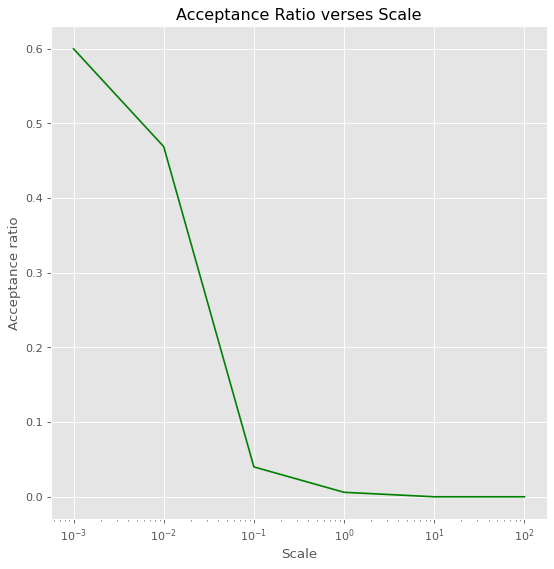

In [ ]:
fig = plt.figure(figsize = (8,8) , dpi = 80)
plt.plot(scale, Acceptance , "g" , )
plt.xlabel("Scale")
plt.ylabel("Acceptance ratio")
plt.title("Acceptance Ratio verses Scale")
plt.xscale("log")
# plt.savefig("Acceptance Ratio verses Scale.png")
# files.download("Acceptance Ratio verses Scale.png")

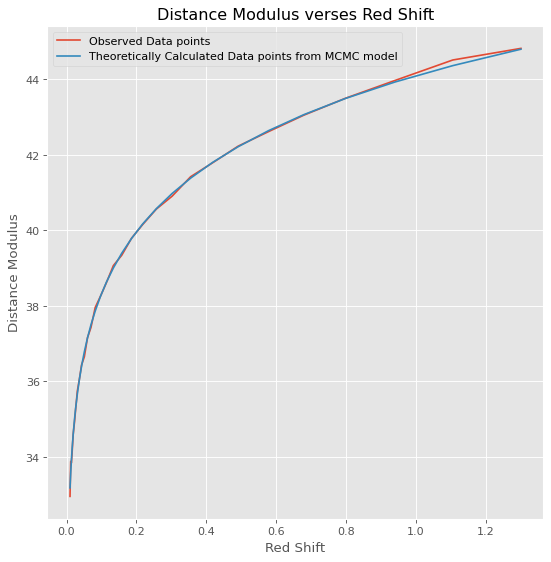

In [ ]:
mu_th_target = []
for z_i in z:
  mu_th_target.append(25 - (5 * np.log10(0.70083242)) + (5*np.log10(Luminosity_Distance(z_i, 0.30083765))))
fig = plt.figure(figsize = (8,8), dpi = 80)
plt.title("Distance Modulus verses Red Shift")
plt.plot(z,mu_obs,label = "Observed Data points")
plt.plot(z,mu_th_target, label = "Theoretically Calculated Data points from MCMC model")
plt.xlabel("Red Shift")
plt.ylabel("Distance Modulus")
plt.legend()
# plt.savefig("Distance Modulus verses Red Shift.png")
# files.download("Distance Modulus verses Red Shift.png")

Without Prior: \\
h = $ 0.70268737 \pm 3.77596439 * 10^{-5} $ \\
w = $ 0.29698964 \pm 8.24171177 * 10^{-5} $ \\
With Prior: \\
h = $ 0.72001074 \pm 2.86380314* 10^{-5} $ \\
w = $ 0.25549483 \pm 3.39868836 * 10^{-5} $ \\

#3)Gelman-Rubin convergence test

# **Importing Essential Librarires**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import warnings
import random
import copy
import sys
from scipy.stats import norm
warnings.filterwarnings('ignore')
style.use('ggplot')
from google.colab import files
random.seed(10)

# **Declaring Global constant Values**

In [ ]:
H0 = 100
c = 3 * (10**5)

# **Defining Functions for computing the luminosity distance and theoretical distance modulus**

In [ ]:
def Eta_function(a, Omega_matter):
  s = ((1 - Omega_matter)/(Omega_matter))**(0.33)
  return_val = 2 * np.sqrt(s**3 + 1) * ((1/(a**4)) - (0.1540 * s/(a**3)) +(0.4304*(s**2/a**2)) + (0.19097*(s**3/a)) + 0.066941 * (s**4))**(-0.125)
  return return_val

In [ ]:
def Luminosity_Distance(z, omega_m):
  return_val = (c)/(H0) * (1+z) * (Eta_function(1, omega_m) - Eta_function((1/(1+z)), omega_m))
  return return_val

# **Defining Function to Convert given covariance array into a matrix**

In [ ]:
def Matrix(arr, N):
  res = np.zeros((N,N))
  for i in range(N):
    for j in range(N):
      res[i][j] = arr[N*i + j]
  return res

# **Main Function**

In [ ]:
# Load the data and covariance array
data = np.loadtxt('jla_mub_0.txt')
z = data[:,0]
mu_obs = data[:,1]
cov_array = np.loadtxt('jla_mub_covmatrix.txt')
N = 31
cov_matrix = Matrix(cov_array, N)
cov_inv = np.linalg.inv(cov_matrix)

# Likelihood function
def log_likelihood(params):
    h, om = params
    mu_th = np.zeros_like(mu_obs)
    for i, z_i in enumerate(z):
        # Compute the theoretical value of the distance modulus
        dl = Luminosity_Distance(z_i, om) # Luminosity Distance
        mu_th[i] =  25 - (5 * np.log10(h)) + (5*np.log10(dl)) # distance modulus
    diff = mu_obs - mu_th
    return -0.5 * np.dot(diff, np.dot(cov_inv, diff))

# Prior function
def log_prior(params):
    h, om = params
    if 0.0 < h < 1.0 and 0.0 < om < 1.0:
        return 0.0
    else:
        return -np.inf

# Proposal function Top Hat
def propose(params, scale):
    return np.random.normal(params, scale)

# **MH - MCMC Code**

In [ ]:
# Define the Metropolis-Hastings algorithm
Rejected_Samples = []
def metropolis_hastings(log_likelihood, log_prior, propose, params, cov, n_steps, scale):
    chain = [params]
    log_prob_chain = [log_prior(params) + log_likelihood(params)]
    n_accept = 0
    for i in range(n_steps):
        params_new = propose(params, scale)
        log_prob_new = log_prior(params_new) + log_likelihood(params_new)
        log_prob_old = log_prob_chain[-1]
        log_accept_ratio = log_prob_new - log_prob_old
        if np.log(np.random.rand()) < log_accept_ratio:
            chain.append(params_new)
            log_prob_chain.append(log_prob_new)
            params = params_new
            n_accept += 1
        else:
            Rejected_Samples.append((params_new))
            chain.append(params)
            log_prob_chain.append(log_prob_old)
    # # Discard the burn-in period of the chain
    burnin = int(n_steps * 0.3)
    chain = chain[burnin:]
    return np.array(chain), np.array(log_prob_chain), n_accept/n_steps

# Set up initial parameters and run the MCMC algorithm
n_steps = [100, 130, 150, 160, 200, 300, 500,1000]
scale = 0.01
number_of_chains = 50
Acceptance = []
chain_val0 = np.array([])
L = 0.7
R_h = []
R_om = []
# Chain_mean = np.zeros(size = ())
for i in range(len(n_steps)):
  Post_mean_all_h = []
  Post_var_all_h = []
  Post_mean_all_om = []
  Post_var_all_om = []
  for j in range(number_of_chains):
    params0 = np.random.rand(2)
    chain1, log_prob_chain, acceptance_ratio = metropolis_hastings(log_likelihood, log_prior, propose, params0, cov_matrix, n_steps[i], scale)
    # Compute the mean of the posterior distribution for different value of initial paramters in the chain
    post_mean_h = np.mean(chain1[:,0], axis=0)
    post_var_h = np.var(chain1[:,0], axis=0) * number_of_chains / (number_of_chains - 1)
    Post_mean_all_h.append(post_mean_h)
    Post_var_all_h.append(post_var_h)
    post_mean_om = np.mean(chain1[:,1], axis=0)
    post_var_om = np.var(chain1[:,1], axis=0) * number_of_chains / (number_of_chains - 1)
    Post_mean_all_om.append(post_mean_om)
    Post_var_all_om.append(post_var_om)
  # Grand_mean_h = np.mean(Post_mean_all_h)
  # Grand_mean_om = np.mean(Post_mean_all_om)
  B_h = np.var(Post_mean_all_h) * L * number_of_chains / (number_of_chains - 1)
  B_om = np.var(Post_mean_all_om) * L * number_of_chains / (number_of_chains - 1)
  W_h = np.mean(Post_var_all_h)
  W_om = np.mean(Post_var_all_om)
  R_h_val = (((L-1)/L * W_h) + (B_h/L))/W_h
  R_om_val = (((L-1)/L * W_om) + (B_om/L))/W_om
  R_h.append(R_h_val)
  R_om.append(R_om_val)

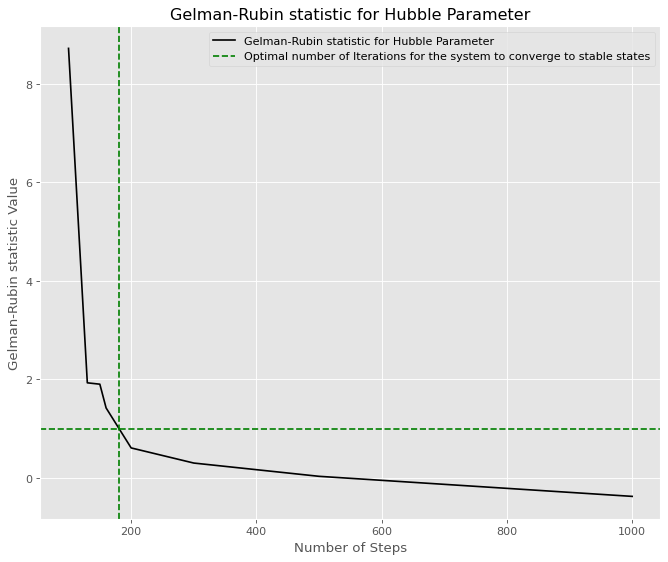

In [ ]:
fig = plt.figure(figsize = (10,8), dpi = 80)
plt.plot(n_steps,R_h, "black", label = "Gelman-Rubin statistic for Hubble Parameter")
plt.title("Gelman-Rubin statistic for Hubble Parameter")
plt.xlabel("Number of Steps")
plt.ylabel("Gelman-Rubin statistic Value")
plt.axhline(y = 1, color = "green", linestyle = "--")
plt.axvline(x = 180, color = "green", linestyle = "--", label = "Optimal number of Iterations for the system to converge to stable states")
plt.legend()

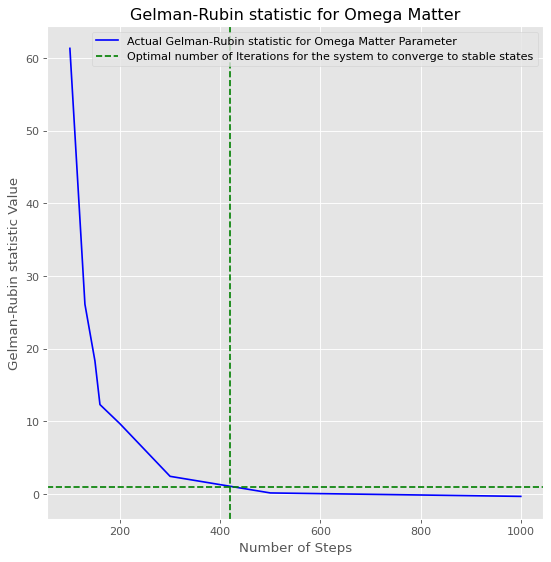

In [ ]:
fig = plt.figure(figsize = (8,8), dpi = 80)
plt.plot(n_steps,R_om, "blue", label = "Actual Gelman-Rubin statistic for Omega Matter Parameter")
plt.title("Gelman-Rubin statistic for Omega Matter")
plt.xlabel("Number of Steps")
plt.ylabel("Gelman-Rubin statistic Value")
plt.axhline(y = 1, color = "green", linestyle = "--")
plt.axvline(x = 420, color = "green", linestyle = "--", label = "Optimal number of Iterations for the system to converge to stable states")
plt.legend()